# ICS 635 - Assignment 1
> Derek Garcia

## Task 1: Data Preprocessing

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

# load data
breast_cancer_data = load_breast_cancer()
x, y = breast_cancer_data.data, breast_cancer_data.target

# split data 80/20 - x are features and y are labels
# https://realpython.com/train-test-split-python-data/
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(x, y, test_size=0.2)

# scale features
# fit_transform on first training to learn AND apply transformation, then just transform the test - don't re-learn
scaler = StandardScaler()
x_train_data, x_test_data = scaler.fit_transform(x_train_data), scaler.transform(x_test_data)

## Task 2: Model Training

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors (KNN)
# https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
N_NEIGHBORS = 5
knn = KNeighborsClassifier(n_neighbors=N_NEIGHBORS)
knn.fit(x_train_data, y_train_data)

# Decision Tree
# https://www.datacamp.com/tutorial/decision-tree-classification-python
MAX_DEPTH = 5
dtc = DecisionTreeClassifier(max_depth=MAX_DEPTH)
dtc.fit(x_train_data, y_train_data)

# Random Forest
# https://www.datacamp.com/tutorial/random-forests-classifier-python
N_ESTIMATORS = 100
rfc = RandomForestClassifier(n_estimators=N_ESTIMATORS)
rfc.fit(x_train_data, y_train_data)


RandomForestClassifier()

## Task 3: Evaluation
> Setup utils

In [13]:
from typing import Tuple
from numpy import ndarray
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def print_and_save_metrics(classifier_name: str, y_pred: ndarray, y_test: ndarray) -> Tuple[float, float, float, float]:
    """
    Print metrics of a prediction

    :param classifier_name: Name of classifier used to make prediction
    :param y_pred: The predicted values
    :param y_test: The expected values
    :return: accuracy, precision, recall, and f1 score
    """
    # calc
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # display
    print(classifier_name)
    print(f"\tAccuracy: {accuracy}")
    print(f"\tPrecision: {precision}")
    print(f"\tRecall: {recall}")
    print(f"\tF1-score: {f1}")
    
    return accuracy, precision, recall, f1

## Task 3: Evaluation
> K-Nearest Neighbors (KNN)

K-Nearest Neighbors
	Accuracy: 0.9736842105263158
	Precision: 0.9743589743589743
	Recall: 0.987012987012987
	F1-score: 0.9806451612903225


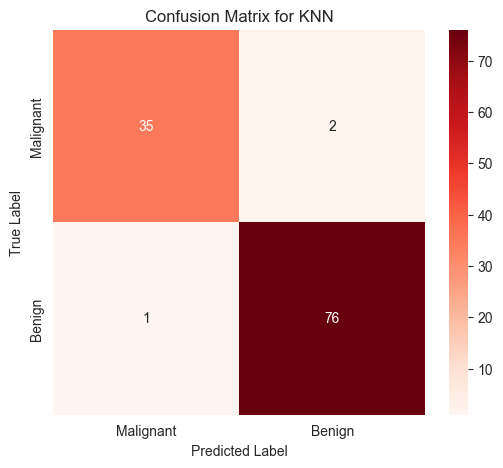

In [14]:
# predict
knn_y_pred = knn.predict(x_test_data)
cm = confusion_matrix(y_test_data, knn_y_pred)

# print metrics
knn_accuracy, knn_precision, knn_recall, knn_f1 = print_and_save_metrics("K-Nearest Neighbors", knn_y_pred, y_test_data)

# plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for KNN")
plt.show()

## Task 3: Evaluation
> Decision Tree

Decision Tree
	Accuracy: 0.9210526315789473
	Precision: 0.9594594594594594
	Recall: 0.922077922077922
	F1-score: 0.9403973509933775


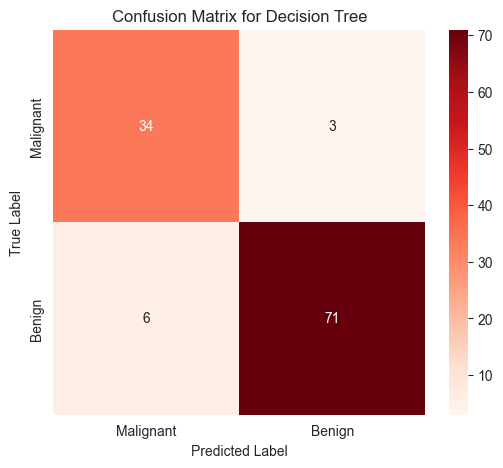

In [15]:
# predict
dt_y_pred = dtc.predict(x_test_data)
cm = confusion_matrix(y_test_data, dt_y_pred)

# print metrics
dt_accuracy, dt_precision, dt_recall, dt_f1 = print_and_save_metrics("Decision Tree", dt_y_pred, y_test_data)

# plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

## Task 3: Evaluation
> Random Forest

Random Forest
	Accuracy: 0.9736842105263158
	Precision: 0.9743589743589743
	Recall: 0.987012987012987
	F1-score: 0.9806451612903225


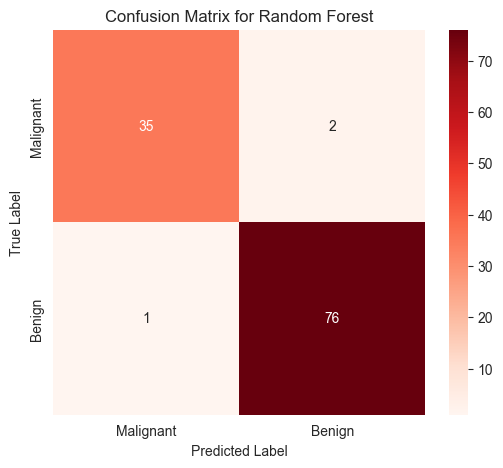

In [16]:
# predict
rf_y_pred = rfc.predict(x_test_data)
cm = confusion_matrix(y_test_data, rf_y_pred)

# print metrics
rf_accuracy, rf_precision, rf_recall, rf_f1 = print_and_save_metrics("Random Forest", rf_y_pred, y_test_data)

# plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest")
plt.show()

## Task 3: Evaluation
> Compare all results

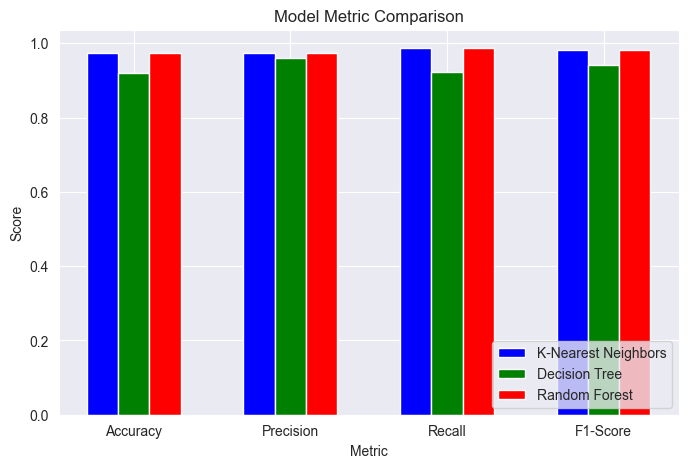

In [17]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'Metric': ["Accuracy", "Precision", "Recall", "F1-Score"],
    'K-Nearest Neighbors': [knn_accuracy, knn_precision, knn_recall, knn_f1],
    'Decision Tree': [dt_accuracy, dt_precision, dt_recall, dt_f1],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1]
})

# config bars
x = np.arange(len(df['Metric']))
width = 0.2

# create fig
fig, ax = plt.subplots(figsize=(8, 5))

# group bars together
ax.bar(x - width, df['K-Nearest Neighbors'], width, label='K-Nearest Neighbors', color='b')
ax.bar(x, df['Decision Tree'], width, label='Decision Tree', color='g')
ax.bar(x + width, df['Random Forest'], width, label='Random Forest', color='r')

# label graph
ax.set_xlabel("Metric")
ax.set_ylabel("Score")
ax.set_title("Model Metric Comparison")
ax.set_xticks(x)
ax.set_xticklabels(df['Metric'])
ax.legend().set_loc("lower right")

# Show plot
plt.show()

## Task 4: Ablation Study
> K-Nearest Neighbors (KNN)

K-Nearest Neighbors (k=3)
	Accuracy: 0.9649122807017544
	Precision: 0.974025974025974
	Recall: 0.974025974025974
	F1-score: 0.974025974025974
K-Nearest Neighbors (k=10)
	Accuracy: 0.9736842105263158
	Precision: 0.9743589743589743
	Recall: 0.987012987012987
	F1-score: 0.9806451612903225


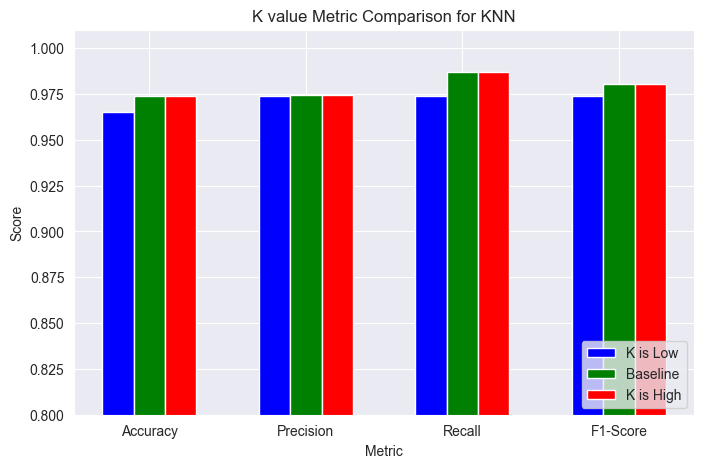

In [18]:
# Case 1: k is low
# retrain model
N_NEIGHBORS = 3
knn = KNeighborsClassifier(n_neighbors=N_NEIGHBORS)
knn.fit(x_train_data, y_train_data)

# predict
knn_y_pred = knn.predict(x_test_data)

# print metrics
knn3_accuracy, knn3_precision, knn3_recall, knn3_f1 = print_and_save_metrics("K-Nearest Neighbors (k=3)", knn_y_pred, y_test_data)

# Case 2: k is high
# retrain model
N_NEIGHBORS = 10
knn = KNeighborsClassifier(n_neighbors=N_NEIGHBORS)
knn.fit(x_train_data, y_train_data)

# predict
knn_y_pred = knn.predict(x_test_data)

# print metrics
knn10_accuracy, knn10_precision, knn10_recall, knn10_f1 = print_and_save_metrics("K-Nearest Neighbors (k=10)", knn_y_pred, y_test_data)

# print graph
df = pd.DataFrame({
    'Metric': ["Accuracy", "Precision", "Recall", "F1-Score"],
    '3': [knn3_accuracy, knn3_precision, knn3_recall, knn3_f1],
    '5': [knn_accuracy, knn_precision, knn_recall, knn_f1],
    '10': [knn10_accuracy, knn10_precision, knn10_recall, knn10_f1]
})

# config bars
x = np.arange(len(df['Metric']))
width = 0.2

# create fig
fig, ax = plt.subplots(figsize=(8, 5))

# group bars together
ax.bar(x - width, df['3'], width, label='K is Low', color='b')
ax.bar(x, df['5'], width, label='Baseline', color='g')
ax.bar(x + width, df['10'], width, label='K is High', color='r')

# set y so can see changes
plt.gca().set_ylim(0.8, 1.01)

# label graph
ax.set_xlabel("Metric")
ax.set_ylabel("Score")
ax.set_title("K value Metric Comparison for KNN")
ax.set_xticks(x)
ax.set_xticklabels(df['Metric'])
ax.legend().set_loc("lower right")

# Show plot
plt.show()

## Task 4: Ablation Study
> Decision Tree

Decision Tree (d=3)
	Accuracy: 0.9210526315789473
	Precision: 0.9594594594594594
	Recall: 0.922077922077922
	F1-score: 0.9403973509933775
Decision Tree (d=10)
	Accuracy: 0.9210526315789473
	Precision: 0.9594594594594594
	Recall: 0.922077922077922
	F1-score: 0.9403973509933775


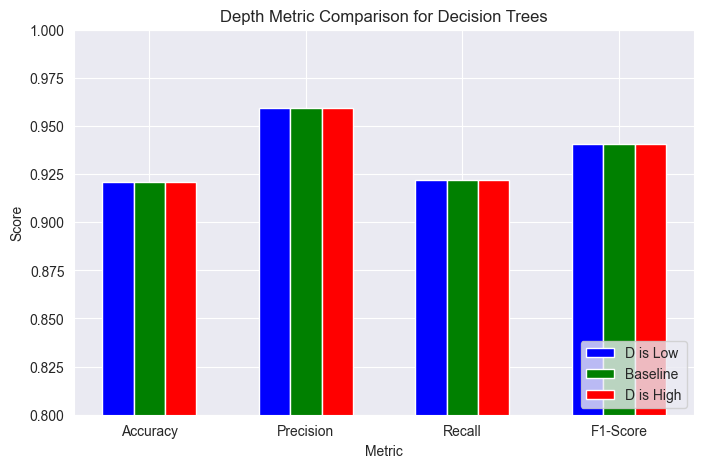

In [19]:
# Case 1: depth is low
MAX_DEPTH = 3
dtc = DecisionTreeClassifier(max_depth=MAX_DEPTH)
dtc.fit(x_train_data, y_train_data)

# print metrics
dt3_accuracy, dt3_precision, dt3_recall, dt3_f1 = print_and_save_metrics("Decision Tree (d=3)", dt_y_pred, y_test_data)

# Case 2: depth is high
MAX_DEPTH = 10
dtc = DecisionTreeClassifier(max_depth=MAX_DEPTH)
dtc.fit(x_train_data, y_train_data)

# print metrics
dt10_accuracy, dt10_precision, dt10_recall, dt10_f1 = print_and_save_metrics("Decision Tree (d=10)", dt_y_pred, y_test_data)

df = pd.DataFrame({
    'Metric': ["Accuracy", "Precision", "Recall", "F1-Score"],
    '3': [dt3_accuracy, dt3_precision, dt3_recall, dt3_f1],
    '5': [dt_accuracy, dt_precision, dt_recall, dt_f1],
    '10': [dt10_accuracy, dt10_precision, dt10_recall, dt10_f1]
})

# config bars
x = np.arange(len(df['Metric']))
width = 0.2

# create fig
fig, ax = plt.subplots(figsize=(8, 5))

# group bars together
ax.bar(x - width, df['3'], width, label='D is Low', color='b')
ax.bar(x, df['5'], width, label='Baseline', color='g')
ax.bar(x + width, df['10'], width, label='D is High', color='r')

# set y so can see changes
plt.gca().set_ylim(0.8, 1)

# label graph
ax.set_xlabel("Metric")
ax.set_ylabel("Score")
ax.set_title("Depth Metric Comparison for Decision Trees")
ax.set_xticks(x)
ax.set_xticklabels(df['Metric'])
ax.legend().set_loc("lower right")

# Show plot
plt.show()

## Task 4: Ablation Study
> Random Forest

Random Forest (d=5)
	Accuracy: 0.9736842105263158
	Precision: 0.9743589743589743
	Recall: 0.987012987012987
	F1-score: 0.9806451612903225
Random Forest (d=100)
	Accuracy: 0.9736842105263158
	Precision: 0.9743589743589743
	Recall: 0.987012987012987
	F1-score: 0.9806451612903225


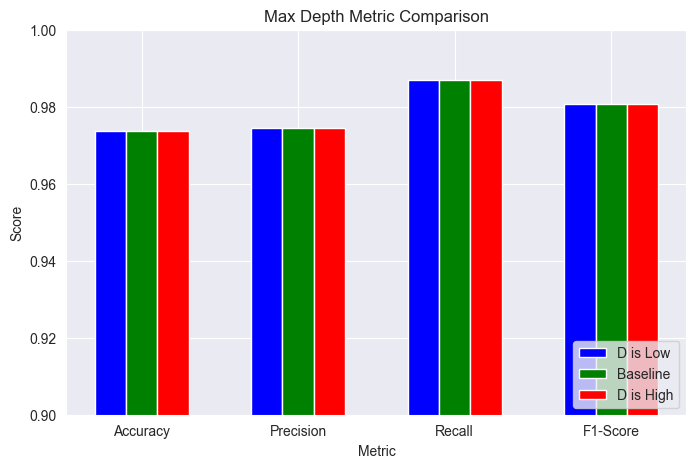

In [20]:
# Case 1: depth is low
MAX_DEPTH = 5
rfc = RandomForestClassifier(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH)
rfc.fit(x_train_data, y_train_data)

# print metrics
rf5_accuracy, rf5_precision, rf5_recall, rf5_f1 = print_and_save_metrics("Random Forest (d=5)", rf_y_pred, y_test_data)

# Case 2: depth is high
MAX_DEPTH = 100
rfc = RandomForestClassifier(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH)
rfc.fit(x_train_data, y_train_data)

# print metrics
rf100_accuracy, rf100_precision, rf100_recall, rf100_f1 = print_and_save_metrics("Random Forest (d=100)", rf_y_pred, y_test_data)

df = pd.DataFrame({
    'Metric': ["Accuracy", "Precision", "Recall", "F1-Score"],
    '5': [rf5_accuracy, rf5_precision, rf5_recall, rf5_f1],
    'None': [rf_accuracy, rf_precision, rf_recall, rf_f1],
    '100': [rf100_accuracy, rf100_precision, rf100_recall, rf100_f1]
})

# config bars
x = np.arange(len(df['Metric']))
width = 0.2

# create fig
fig, ax = plt.subplots(figsize=(8, 5))

# group bars together
ax.bar(x - width, df['5'], width, label='D is Low', color='b')
ax.bar(x, df['None'], width, label='Baseline', color='g')
ax.bar(x + width, df['100'], width, label='D is High', color='r')

# set y so can see changes
plt.gca().set_ylim(0.9, 1)

# label graph
ax.set_xlabel("Metric")
ax.set_ylabel("Score")
ax.set_title("Max Depth Metric Comparison")
ax.set_xticks(x)
ax.set_xticklabels(df['Metric'])
ax.legend().set_loc("lower right")

# Show plot
plt.show()